In [3]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [4]:
df = pd.read_csv('data/etf/jan2025/cleaned/gdx_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [5]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [6]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,700.0,35.15,...,35.05,100.0,35.27,200.0,0.001137,0.000142,0.000853,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,35.17,500.0,35.18,200.0,35.16,...,35.07,100.0,35.27,200.0,0.000853,0.000284,0.000853,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,100.0,35.15,...,35.05,100.0,35.27,200.0,0.001137,0.000426,0.000853,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,35.17,400.0,35.18,100.0,35.16,...,35.07,100.0,35.27,200.0,0.000853,0.000000,0.000853,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,35.18,610.0,35.19,2400.0,35.17,...,35.09,100.0,35.29,100.0,0.000711,0.000000,0.000426,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,38.92,600.0,38.93,800.0,38.91,...,38.83,100.0,39.02,200.0,0.000642,0.001670,0.002697,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,38.92,1100.0,38.94,200.0,38.91,...,38.83,100.0,39.03,100.0,0.000385,0.001413,0.002440,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,38.93,400.0,38.94,200.0,38.92,...,38.84,200.0,39.03,100.0,0.000385,0.001413,0.002440,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,38.93,1500.0,38.95,800.0,38.92,...,38.84,200.0,39.05,100.0,0.000128,0.001156,0.002183,0,2,2


In [7]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [8]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.180226,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.001137,0.000142,0.000853,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,-1.257408,-0.343107,-1.261676,-0.664708,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.000853,0.000284,0.000853,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.761605,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.001137,0.000426,0.000853,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,-1.257408,-0.442601,-1.261676,-0.761605,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.000853,0.000000,0.000853,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,-1.250038,-0.233663,-1.254305,1.467017,-1.249777,...,-1.230891,-0.289312,-1.256227,-0.291127,0.000711,0.000000,0.000426,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,1.506150,-0.243613,1.502647,-0.083329,1.506328,...,1.516640,-0.289312,1.485680,0.167599,0.000642,0.001670,0.002697,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,1.506150,0.253859,1.510019,-0.664708,1.506328,...,1.516640,-0.289312,1.493031,-0.291127,0.000385,0.001413,0.002440,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,1.513520,-0.442601,1.510019,-0.664708,1.513697,...,1.523986,0.146142,1.493031,-0.291127,0.000385,0.001413,0.002440,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,1.513520,0.651837,1.517390,-0.083329,1.513697,...,1.523986,0.146142,1.507733,-0.291127,0.000128,0.001156,0.002183,0,2,2


In [9]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [10]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
1,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
2,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
3,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
4,-1.250038,-1.249777,-1.249436,-1.249028,-1.248428,-1.247529,-1.246142,-1.243776,-1.239343,-1.230891,...,0.700116,1.735179,-0.625941,1.598717,-0.422550,-0.078338,-0.291127,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,-0.322478,1.193974,-0.388171,0.333686,-0.422550,-0.346646,0.167599,2,2,2
338957,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338958,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338959,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,-0.436100,-0.193675,-0.744825,-0.552696,-0.237906,-0.346646,-0.291127,0,2,2


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03    11408
2025-01-06    18970
2025-01-07    19495
2025-01-08    19059
2025-01-10    25027
2025-01-13    21295
2025-01-14    16302
2025-01-15    17897
2025-01-16    17470
2025-01-17    16188
2025-01-21    15772
2025-01-22    13444
2025-01-23    14130
2025-01-24    11897
2025-01-27    19327
2025-01-28    11643
2025-01-29    24406
2025-01-30    20731
2025-01-31    24500
dtype: int64

In [18]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [19]:
df_train = df_train[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]

In [20]:
df_test.to_numpy()[:, -3:]

array([[0., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       ...,
       [2., 2., 2.],
       [0., 2., 2.],
       [0., 2., 2.]], shape=(81280, 3))

In [21]:
#import  models
from models.dataset import Dataset as Dataset
#import importlib
#importlib.reload(models)

batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([183012, 1, 100, 40]) torch.Size([183012])


In [22]:
from models.cnn2 import CNN2

In [23]:
model = CNN2(num_classes = dataset_train.num_classes)
model.to(device)

CNN2(
  (conv1): Conv2d(1, 16, kernel_size=(10, 40), stride=(1, 1), padding=(0, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu1): PReLU(num_parameters=1)
  (conv2): Conv1d(16, 16, kernel_size=(10,), stride=(1,))
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu2): PReLU(num_parameters=1)
  (conv3): Conv1d(16, 32, kernel_size=(8,), stride=(1,))
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu3): PReLU(num_parameters=1)
  (conv4): Conv1d(32, 32, kernel_size=(8,), stride=(1,))
  (bn4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu4): PReLU(num_parameters=1)
  (conv5): Conv1d(32, 32, kernel_size=(6,), stride=(1,))
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu5): PReLU(num_parameters=1)
  (fc1): Linear(in_features=7968, out_features=32, bias=True)


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [25]:
from models.gd import GradientDescent as GD, GradientDescent


train_losses, val_losses = GD(device).batch(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x13664 and 7968x32)

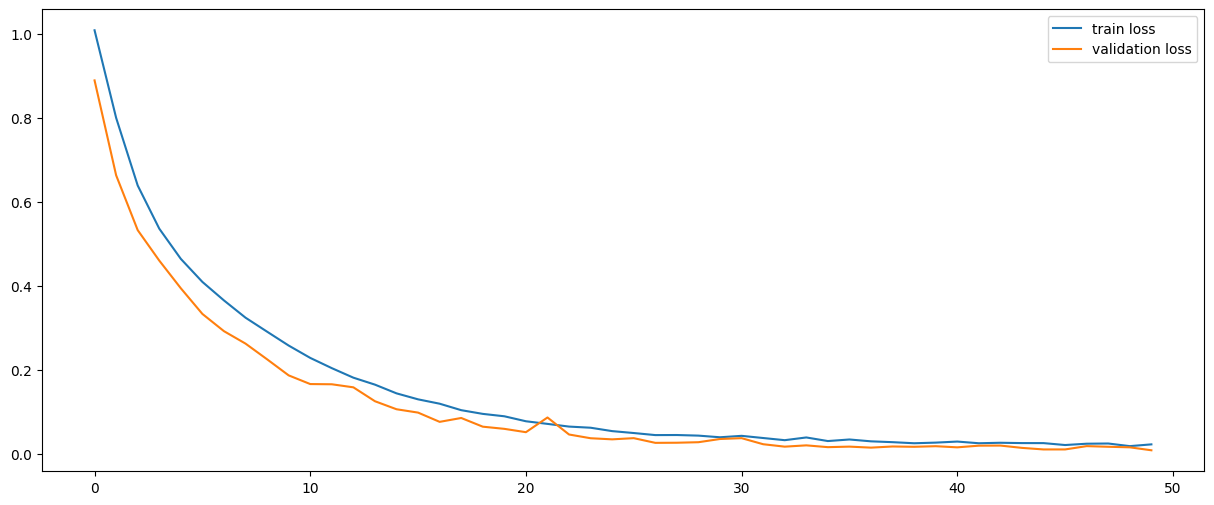

In [19]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [20]:
state = torch.load('./best_val_model_pytorch.pt')
model = CNN2(num_classes = test_loader.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.9981


In [21]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [22]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.9980869809400119
              precision    recall  f1-score   support

           0     0.9968    0.9973    0.9971     16096
           1     0.9983    0.9986    0.9985     19890
           2     0.9988    0.9981    0.9985     20992

    accuracy                         0.9981     56978
   macro avg     0.9980    0.9980    0.9980     56978
weighted avg     0.9981    0.9981    0.9981     56978



In [23]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100  Count  Percent
0           0  28302    26.66
1           1  37937    35.73
2           2  39935    37.61
